# NY Motor Vehicle Collisions – Exploratory Data Analysis  
In this notebook, we analyze New York’s Vehicular crash data available at https://data.cityofnewyork.us/Public-Safety/Motor-Vehicle-Collisions-Crashes/h9gi-nx95


The data contains information from all police reported motor vehicle collisions in NYC. The information for this dataset is collated from the police report, called MV104-AN, which is required to be filled out for collisions where someone is injured or killed, or where there is at least $1000 worth of damage.

Data is available from 2012-07-01 onwards, however for this analysis, we will limit ourselves to the period up to 2023-08-15, which is when the data was downloaded.

First, we perform unstructured exploration of the data, and then try to answer the following questions:

- We look for which borough has had the maximum number of crashes reported since 2012.

- We relate the number of crashes to to the borough's population to find out which borough has the maximum number of crashes for every 100,000 people. Even though the data does not have this information, we can combine the crash data with the population estimates for the boroughs also available from the City of New York's website (https://data.cityofnewyork.us/City-Government/New-York-City-Population-by-Borough-1950-2040/xywu-7bv9)

| Borough | Population |
| --- | --- |
| Bronx | 1446788 |
| Brooklyn | 2648452 |
| Manhattan | 1638281 |
| Queens | 2330295 |
| Staten Island | 487155 |  

  
- We look for the leading cause of crashes.

- We also look for the top-3 causes of crashes, and try to calculate what proportion of all crashes are caused by these top-3 causes.

- We then look to some of the more serious implications of crashes by examining how many accidents involved at least one fatality.

- We then compute, on average, out of every 1000 accidents, how many have resulted in at least one person dead.

- We also look for missing data and try to compute the proportion of accidents in the data that do not have a Borough code.

- The fields 'VEHICLE TYPE CODE 1' and 'VEHICLE TYPE CODE 2' represent the first two vehicles involved in the accident.  We look for which combinations of vehicles have the most number of accidents.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
import phik
from IPython.display import Markdown as md


In [6]:
df = pd.read_pickle("shared/Motor_Vehicle_Collisions_-_Crashes.pkl")
df


,CRASH DATE_CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,2021-09-11 02:39:00,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,2.0,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,2022-03-26 11:45:00,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,2022-06-29 06:55:00,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,0.0,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
3,2021-09-11 09:35:00,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,0.0,...,NaN,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN
4,2021-12-14 08:13:00,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,0.0,...,NaN,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018240,2023-07-03 18:05:00,NaN,NaN,40.866806,-73.931010,"(40.866806, -73.93101)",RIVERSIDE DRIVE,NaN,NaN,0.0,...,Unspecified,NaN,NaN,NaN,4648110,Sedan,Sedan,NaN,NaN,NaN
2018241,2023-07-22 21:39:00,BRONX,10457.0,40.844177,-73.902920,"(40.844177, -73.90292)",EAST 174 STREET,WEBSTER AVENUE,NaN,1.0,...,NaN,NaN,NaN,NaN,4648117,Sedan,NaN,NaN,NaN,NaN
2018242,2023-07-02 17:55:00,MANHATTAN,10006.0,40.711033,-74.014540,"(40.711033, -74.01454)",WEST STREET,LIBERTY STREET,NaN,0.0,...,NaN,NaN,NaN,NaN,4648366,Taxi,NaN,NaN,NaN,NaN
2018243,2023-07-22 13:15:00,QUEENS,11433.0,40.691580,-73.793190,"(40.69158, -73.79319)",110 AVENUE,157 STREET,NaN,1.0,...,Driver Inattention/Distraction,NaN,NaN,NaN,4648129,Station Wagon/Sport Utility Vehicle,E-Bike,NaN,NaN,NaN


***
### Exploratory Data Analysis to conduct few inquiries:
***


**1. General information about the dataset**

In [7]:
# Display the first few rows of the dataset
df.head()

# Get basic statistics of numeric columns
df.describe()

# Check the data types and missing values
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2018245 entries, 0 to 2018244
Data columns (total 28 columns):
 #   Column                         Dtype         
---  ------                         -----         
 0   CRASH DATE_CRASH TIME          datetime64[ns]
 1   BOROUGH                        object        
 2   ZIP CODE                       object        
 3   LATITUDE                       float64       
 4   LONGITUDE                      float64       
 5   LOCATION                       object        
 6   ON STREET NAME                 object        
 7   CROSS STREET NAME              object        
 8   OFF STREET NAME                object        
 9   NUMBER OF PERSONS INJURED      float64       
 10  NUMBER OF PERSONS KILLED       float64       
 11  NUMBER OF PEDESTRIANS INJURED  int64         
 12  NUMBER OF PEDESTRIANS KILLED   int64         
 13  NUMBER OF CYCLIST INJURED      int64         
 14  NUMBER OF CYCLIST KILLED       int64         
 15  NUMBER OF MOTOR

**2. Range of values for numeric columns**






In [9]:
data_types = df.dtypes
numeric_columns = data_types[data_types != 'object'].index  # Assuming non-object-type columns are numeric
print("Range of Values of :")
for col in numeric_columns:
    min_value = df[col].min()
    max_value = df[col].max()
    print(f"{col}: {min_value} to {max_value}")

Range of Values of :
CRASH DATE_CRASH TIME: 2012-07-01 00:05:00 to 2023-08-15 23:59:00
LATITUDE: 0.0 to 43.344444
LONGITUDE: -201.35999 to 0.0
NUMBER OF PERSONS INJURED: 0.0 to 43.0
NUMBER OF PERSONS KILLED: 0.0 to 8.0
NUMBER OF PEDESTRIANS INJURED: 0 to 27
NUMBER OF PEDESTRIANS KILLED: 0 to 6
NUMBER OF CYCLIST INJURED: 0 to 4
NUMBER OF CYCLIST KILLED: 0 to 2
NUMBER OF MOTORIST INJURED: 0 to 43
NUMBER OF MOTORIST KILLED: 0 to 5
COLLISION_ID: 22 to 4655026


***
## Analyses of crashes in NYC boroughs
#### 1.Borough with the maximum number of crashes reported since 2012

In [52]:
crashes_by_borough = df['BOROUGH'].value_counts()

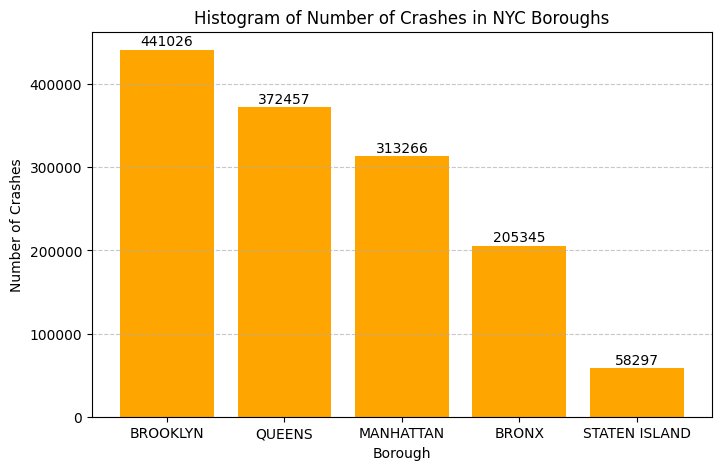

In [53]:
# Create a histogram
plt.figure(figsize=(8, 5))
bars = plt.bar(crashes_by_borough.index,crashes_by_borough.values, color="orange")
plt.xlabel("Borough")
plt.ylabel("Number of Crashes")
plt.title("Histogram of Number of Crashes in NYC Boroughs")
plt.xticks(crashes_by_borough.index)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Annotate each bar with its count
for bar in bars:
    height = bar.get_height()
    plt.annotate(
        f"{int(height)}",  # Format the count as an integer
        xy=(bar.get_x() + bar.get_width() / 2, height),
        xytext=(0, 3),  # 3 points vertical offset for better placement
        textcoords="offset points",
        ha="center",
    )

plt.show()

In [42]:
# Find the borough with the highest number of crashes
highest_crash_borough = crashes_by_borough.idxmax()
highest_crash_count = crashes_by_borough.max()

# Display the result in a formatted way
print(f"Borough with the highest number of crashes: {highest_crash_borough}")
print(f"Number of crashes in this borough: {highest_crash_count}")



Borough with the highest number of crashes: BROOKLYN
Number of crashes in this borough: 441026


#### 2.Borough with the maximum number of crashes adjusted for population


In [114]:
## Add header to this data of crashes by borough
crashes_by_borough = df['BOROUGH'].value_counts().reset_index()
crashes_by_borough.columns = ["Borough","Total Crashes"]
crashes_by_borough

,Borough,Total Crashes
0,BROOKLYN,441026
1,QUEENS,372457
2,MANHATTAN,313266
3,BRONX,205345
4,STATEN ISLAND,58297


In [115]:
# Add new column with data of population of each borough
population = [2648452,2330295,1638281,1446788,487155]

# Add the new column
crashes_by_borough['Population'] = population
crashes_by_borough

,Borough,Total Crashes,Population
0,BROOKLYN,441026,2648452
1,QUEENS,372457,2330295
2,MANHATTAN,313266,1638281
3,BRONX,205345,1446788
4,STATEN ISLAND,58297,487155


In [116]:
# Now adjust the data of crashes for population
adjusted_pop = (crashes_by_borough["Total Crashes"].values/crashes_by_borough["Population"].values)*100000

# Add this new column
crashes_by_borough['Adjusted Value'] = adjusted_pop
crashes_by_borough

,Borough,Total Crashes,Population,Adjusted Value
0,BROOKLYN,441026,2648452,16652.217975
1,QUEENS,372457,2330295,15983.255339
2,MANHATTAN,313266,1638281,19121.628097
3,BRONX,205345,1446788,14193.164444
4,STATEN ISLAND,58297,487155,11966.827806


In [122]:
# Find the borough with the highest number of crashes after population adjustment
highest_crash_index = crashes_by_borough["Adjusted Value"].idxmax()
highest_crash_count = crashes_by_borough["Adjusted Value"].max()
index =crashes_by_borough.loc[highest_crash_index,"Borough"]

# Display the result in a formatted way
print(f"Borough with the highest number of crashes: {index}")
print(f"Number of crashes in this borough: {round(highest_crash_count)}")

Borough with the highest number of crashes: MANHATTAN
Number of crashes in this borough: 19122


#### 3.Analyzing the leading cause of crashes

In [123]:
# Filter out rows where 'CONTRIBUTING FACTOR VEHICLE 1' is 'Unspecified'
data = df[df['CONTRIBUTING FACTOR VEHICLE 1'] != 'Unspecified']

# Count the occurrences of each contributing factor
leading_cause = data['CONTRIBUTING FACTOR VEHICLE 1'].value_counts().idxmax()

total_accidents = len(data)
leading_cause_accidents = len(data[data['CONTRIBUTING FACTOR VEHICLE 1'] == leading_cause])
proportion = leading_cause_accidents / total_accidents

# Display the leading cause of crashes
print("Leading cause of crashes (ignoring 'Unspecified'):", leading_cause)
print("Proportion :",roundup(proportion*100,1),"%")


Leading cause of crashes (ignoring 'Unspecified'): Driver Inattention/Distraction
Proportion : 30.3 %


#### 4.Top 3 causes of crashes under Contributing Factor Vehicle 1

In [136]:
# Count the occurrences of each contributing factor
contributing_factors = data['CONTRIBUTING FACTOR VEHICLE 1'].value_counts()

# Get the top 3 contributing factors (excluding 'Unspecified')
top_3_factors = contributing_factors.head(3).index.tolist()

# Filter the data to include only the top 3 factors
data_top_3_factors = data[data['CONTRIBUTING FACTOR VEHICLE 1'].isin(top_3_factors)]

# Calculate the proportion of total crashes accounted for by the top 3 factors
total_accidents = len(data)
top_3_factors_accidents = len(data_top_3_factors)
proportion = top_3_factors_accidents / total_accidents

# Display the proportion
print(f"Proportion of total crashes accounted for by the top 3 causes: {proportion:.1%}")

Proportion of total crashes accounted for by the top 3 causes: 47.4%


#### 5.Analyzing fatalities

In [140]:
# Determine the total count of accidents that involved at least one fatality
accidents_with_fatality = len(df[df['NUMBER OF PERSONS KILLED'] > 0])
print("Total such accidents:",accidents_with_fatality)

Total such accidents: 2804


#### 6.Likelihood of fatal accidents
#### On average, out of every 1000 accidents, how many have resulted in at least death one person?

In [147]:
print("Likelihood of fatal accidents:",(accidents_with_fatality/len(df))*1000)

Likelihood of fatal accidents: 1.3893258747079764


#### 7.Missing data
#### What proportion of accidents in the data do not have a Borough code?

In [154]:
# Total of missing valued rows/ total rows
missing_borough_count = df['BOROUGH'].isna().sum()
resulted_value = round(missing_borough_count/len(df),3)*100
print("Proportion of accidents without a Borough code:",resulted_value,"%")

Proportion of accidents without a Borough code: 31.1 %


#### 8.The combination of vehicles having the most number of accidents

In [156]:
# Create a new table that combines 'VEHICLE TYPE CODE 1' and 'VEHICLE TYPE CODE 2'
df['Vehicle Combination'] = df['VEHICLE TYPE CODE 1'] + " + " + df['VEHICLE TYPE CODE 2']

# Count the occurrences of each combination
vehicle_combination_counts = df['Vehicle Combination'].value_counts()

# Get the combination with the highest count
most_common_combination = vehicle_combination_counts.idxmax()
most_common_count = vehicle_combination_counts.max()

# Display the most common combination and its count
print(f"The combination of vehicles with the most accidents is: {most_common_combination}")
print(f"Number of accidents involving this combination: {most_common_count}")


The combination of vehicles with the most accidents is: Sedan + Sedan
Number of accidents involving this combination: 197944


**********************************************
## End of Document 
**********************************************